# Titanic Dataset Cleaning & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
df = pd.read_csv(r"C:\Sai Jayanth\Internships\Upzenix\Week 2\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning

In [4]:

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

# Normalize numeric features
scaler = StandardScaler()
df[['Age_norm', 'Fare_norm']] = scaler.fit_transform(df[['Age', 'Fare']])

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,Age_norm,Fare_norm
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,-0.565736,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0.663861,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,-0.258337,-0.488854
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0.433312,0.420730
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.433312,-0.486337


## Visualizations

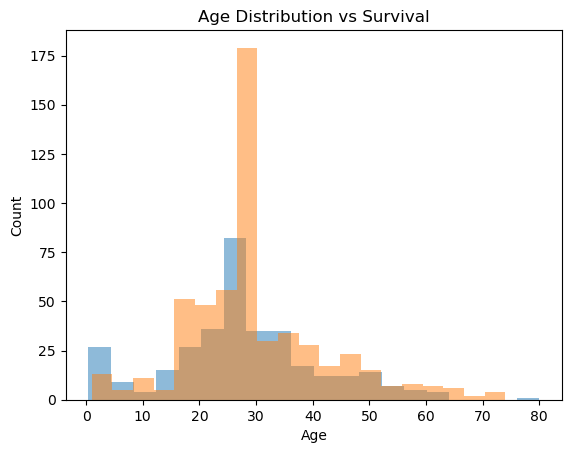

In [5]:

# Age vs Survival
plt.figure()
plt.hist(df[df['Survived']==1]['Age'], alpha=0.5, bins=20)
plt.hist(df[df['Survived']==0]['Age'], alpha=0.5, bins=20)
plt.title("Age Distribution vs Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


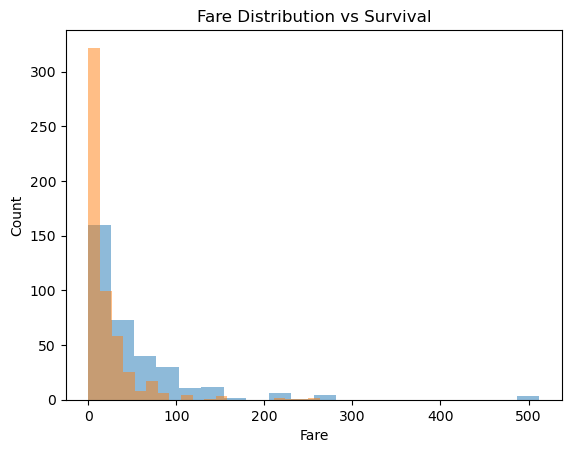

In [6]:

# Fare vs Survival
plt.figure()
plt.hist(df[df['Survived']==1]['Fare'], alpha=0.5, bins=20)
plt.hist(df[df['Survived']==0]['Fare'], alpha=0.5, bins=20)
plt.title("Fare Distribution vs Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


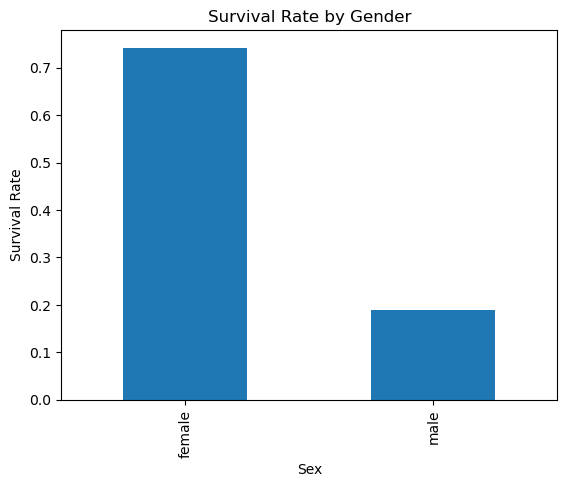

In [7]:

# Gender Survival Rate
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.show()


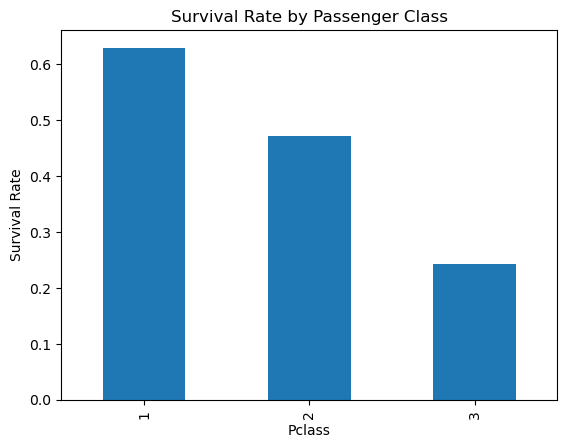

In [8]:

# Class-wise Survival
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


## Key Insights

- Females survived significantly more than males
- First-class passengers had the highest survival rate
- Higher fare correlated with higher survival
- Younger passengers had slightly better survival chances